# Klasifikasi Pada Dataset "Iris"
#### Akan dilakukan analisis klasifikasi pada dataset "Iris" (Dataset iris adalah dataset dari sns yang diadakan untuk eksperimen metode machine learning)

## Visualisasi Data
#### Pertama dilakukan visualisasi dan pengecekkan pada dataset untuk mendapatkan insight mengenai dataset dan perlakuan data preprocessing

In [1]:
# Import modul yang digunakan
import seaborn as sns; sns.set(style="ticks", color_codes=True) # Modul untuk plot
import pandas as pd # Modul untuk mengolah dataset dalam dataframe
from sklearn.linear_model import LogisticRegression #Modul untuk Logistic Regression
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset "Iris" pada variable df
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
    code_species_map = dict(zip(
    range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
    for c in ds['target']]
    return df
df = get_iris_df()

In [3]:
# Lihat 5 data paling atas
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [4]:
# Lihat statistik deskriptif data
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [5]:
#Lihat info datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Terlihat data sudah bersih, tidak ada NaN untuk seluruh data karena 150 entries dan 150 non-null 

## Pairplot
#### Selanjutnya dilakukan pairplot untuk melihat sebaran data untuk tiap feature

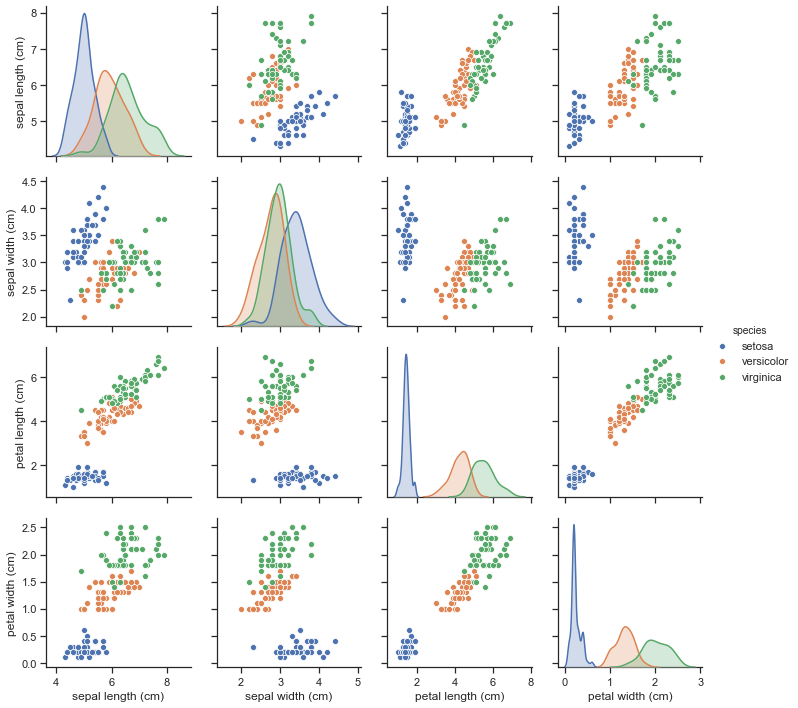

In [6]:
# Lihat gambaran data dengan plot, dipisahkan oleh warna berdasarkan spesies
sns.pairplot(df, hue='species')

## Correlation Heat Map
#### Selanjutnya dilakukan correlation heat map plotting untuk mengetahui correlation antar feature. Hal ini dilakukan karena beberapa metode machine learning memiliki correlation bias

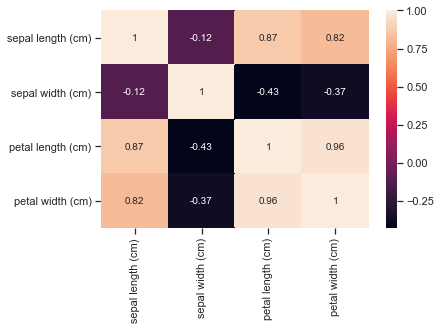

In [7]:
no_id_data = df.copy()
sns.heatmap(data = no_id_data.corr(), annot = True)
plt.show()

## Perbandingan Classifier Logistic Regression Berdasarkan Variasi Jumlah Feature dan Jenis Feature Input
#### Berdasarkan visualisasi data dari grafik, terlihat bahwa terdapat feature dengan irisan antar data yang minimal, adalah:
1. petal_length dan petal_width (Classifier1)

#### Dua feature dengan irisan antar data yang maksimal, adalah:
2. sepal_length dan sepal_width (Classifier2)

#### Kemudian juga digunakan perbandingan dengan input empat feature:
3. petal_length, petal_width, sepal_length, sepal_width (Classifier3)

In [8]:
# Input dan Output Variable
x=df[['petal length (cm)','petal width (cm)','sepal length (cm)', 'sepal width (cm)']].values
y=df['species'].values

# Train-Test Split untuk Mengurangi Overfitting dan Pengujian yang Tidak Bias
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x1_train=x_train[:,[0,1]]
x2_train=x_train[:,[2,3]]
x1_test=x_test[:,[0,1]]
x2_test=x_test[:,[2,3]]

In [9]:
# Membuat model Logistic Regression
classifier1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x1_train, y_train)
classifier2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x2_train, y_train)
classifier3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=200).fit(x_train,y_train) 
#perubahan max_iter menjadi 200 karena untuk max_iter=100, program belum konvergen

In [10]:
classifier1.score(x1_test, y_test)

1.0

In [11]:
classifier2.score(x2_test, y_test)

0.9333333333333333

In [12]:
classifier3.score(x_test,y_test)

1.0

### Kesimpulan
#### 1. Terlihat lebih akurat kombinasi feature petal_length dan petal_width karena covariant yang lebih tinggi dan secara visual, data lebih tercluster
#### 2. Terlihat hasil 4 Feature selalu lebih akurat atau sama dengan 2 Feature (Classifier1) karena pada Classifier1, feature yang digunakan adalah feature yang memiliki clustering antar data yang paling baik, dan pada Classifier2, feature juga tercluster tapi tidak sebaik feature pada Classifier1

# Pembuatan Classifier Multi Layer Perceptron
#### Dibuat MLP classifier dengan input 4 feature untuk membandingkan kinerja dengan logistic regression (Classifier4)

In [20]:
from sklearn.neural_network import MLPClassifier
X = x_train
Y = y_train
classifier4 = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(9, 4), random_state=1, max_iter=99999)
classifier4.fit(X,Y)

MLPClassifier(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=99999, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
classifier4.score(x_test,y_test)

0.9666666666666667

### Kesimpulan
#### 1. Diperoleh hasil yang mirip dengan logistic regression dengan 4 feature

# Classifier Evaluation
#### Akan dianalisis performa dari classifier dengan menggunakan metode sebagai berikut
1. Confusion Matrices
2. ROC Curves
3. DET Curves

In [15]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [16]:
actual = y_test
predicted = classifier1.predict(x1_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
Accuracy Score :
1.0
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
actual = y_test
predicted = classifier2.predict(x2_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[10  0  0]
 [ 0  9  2]
 [ 0  0  9]]
Accuracy Score :
0.9333333333333333
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.82      0.90        11
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [18]:
actual = y_test
predicted = classifier3.predict(x_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
Accuracy Score :
1.0
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
actual = y_test
predicted = classifier4.predict(x_test) 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :')
print(accuracy_score(actual, predicted)) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
Accuracy Score :
0.9666666666666667
Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.91      0.95        11
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

